In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
data_file = "/content/Ecommerce_Customers.csv"
ecommerce_df = pd.read_csv(data_file)
print(ecommerce_df.head())
print(ecommerce_df.describe())
print(ecommerce_df.shape)
ecommerce_df.info()

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

In [3]:
# Plotting setup
sns.set(style="whitegrid", palette="GnBu")
plot_directory = 'fig/'

# Ensure the 'fig' directory exists
import os
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Function to save and show plot
def save_and_show_plot(filename):
    plt.savefig(plot_directory + filename)
    plt.show()

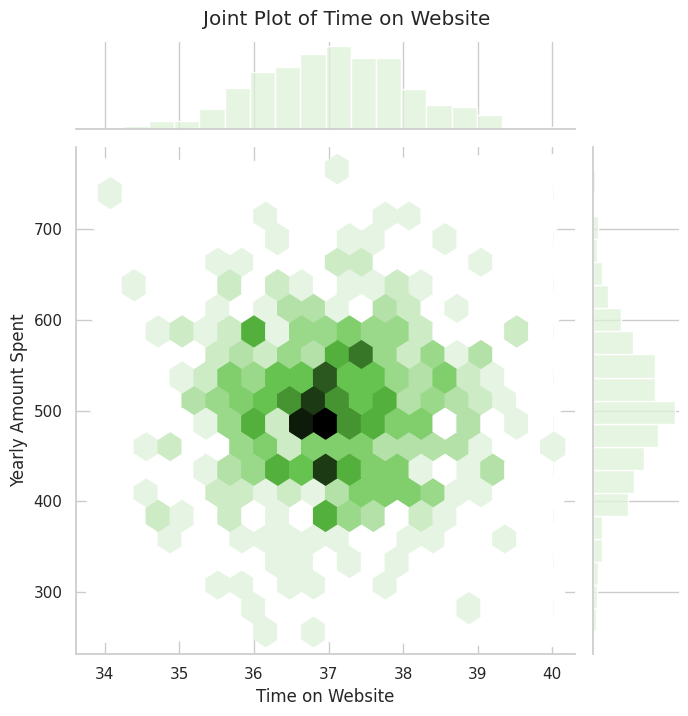

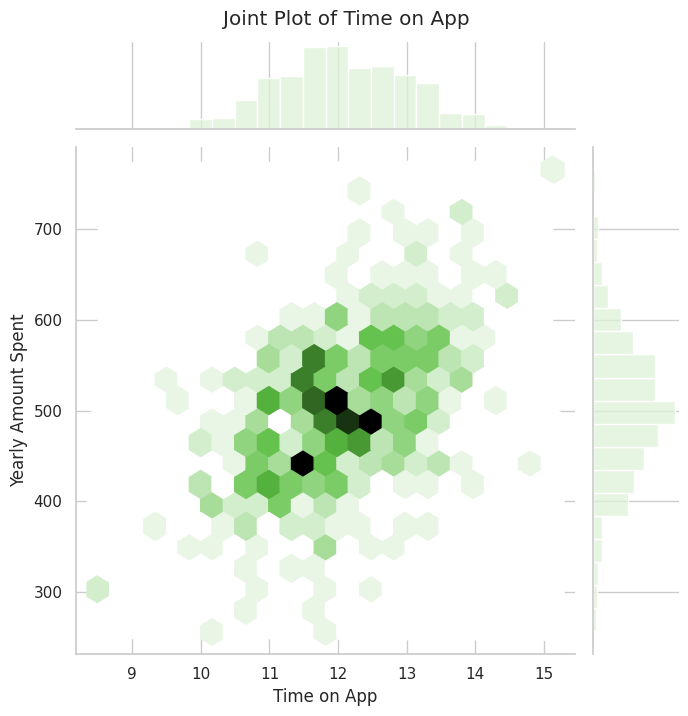

In [4]:
# Joint plots
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=ecommerce_df, kind="hex", height=7)
plt.suptitle("Joint Plot of Time on Website", y=1.02)
save_and_show_plot('joint_website.png')

sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=ecommerce_df, kind="hex", height=7)
plt.suptitle("Joint Plot of Time on App", y=1.02)
save_and_show_plot('joint_app.png')

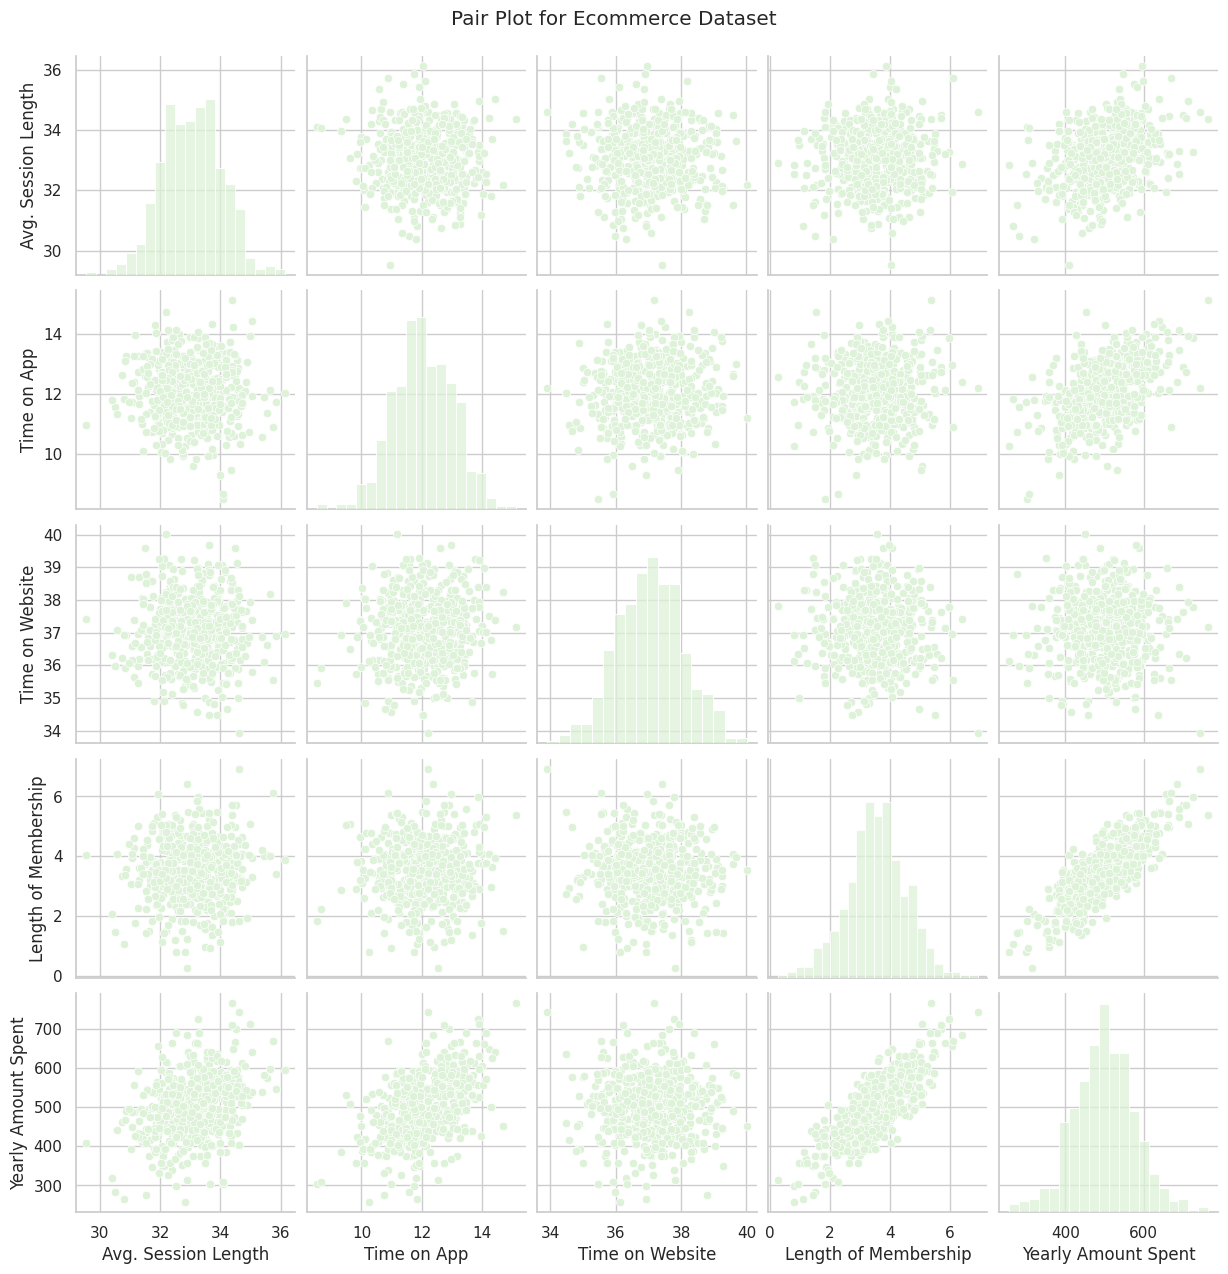

In [5]:
# Pair plot
sns.pairplot(ecommerce_df)
plt.suptitle("Pair Plot for Ecommerce Dataset", y=1.02)
save_and_show_plot('pair_plot.png')

In [6]:
# Feature selection and data preparation
columns_to_drop = ecommerce_df.select_dtypes(include='object').columns
print(columns_to_drop)
ecommerce_df_numerical = ecommerce_df.drop(columns=columns_to_drop)

X = ecommerce_df_numerical.iloc[:, :-1]
y = ecommerce_df_numerical.iloc[:, -1]

Index(['Email', 'Address', 'Avatar'], dtype='object')


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [15]:
y_predict = lin_reg.predict(X_test)
y_predict

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

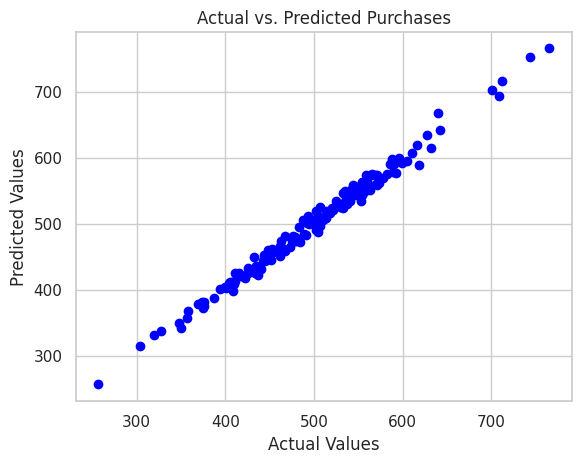

In [16]:
# Scatter plot of predictions
plt.scatter(y_test, y_predict, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Purchases')
save_and_show_plot('scatter_predictions.png')

In [17]:
# Evaluation Metrics
def print_evaluation_metrics(y_true, y_pred, dataset_type='Train'):
    print("\n" + 10 * '-', f"{dataset_type} " + 10 * '-')
    print('R^2:', round(r2_score(y_true, y_pred), 3))
    print('MAE:', round(mean_absolute_error(y_true, y_pred), 3))
    print('MSE:', round(mean_squared_error(y_true, y_pred), 3))
    print('RMSE:', round(np.sqrt(mean_squared_error(y_true, y_pred)), 3))

print_evaluation_metrics(y_train, lin_reg.predict(X_train), 'Train')
print_evaluation_metrics(y_test, y_predict, 'Test')


---------- Train ----------
R^2: 0.982
MAE: 8.181
MSE: 106.851
RMSE: 10.337

---------- Test ----------
R^2: 0.989
MAE: 7.228
MSE: 79.813
RMSE: 8.934


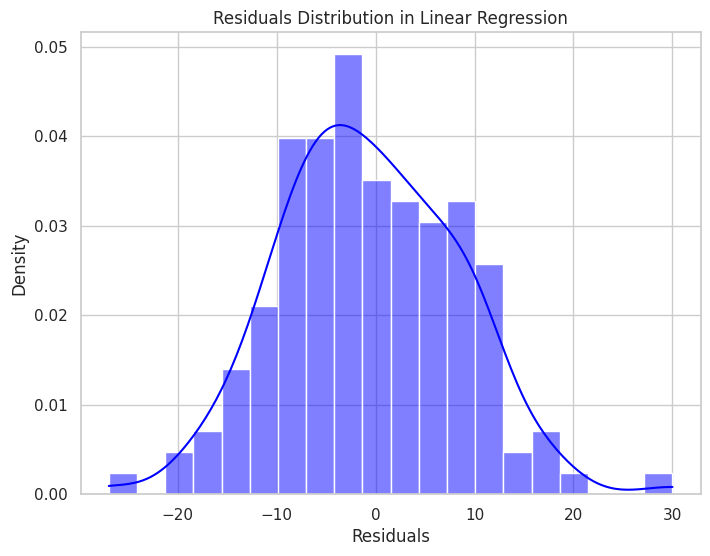

In [18]:
# Plotting residuals
residuals = y_test - y_predict
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20, color='blue', stat='density')
plt.title('Residuals Distribution in Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Density')
save_and_show_plot('residuals_distribution.png')

In [19]:
# Coefficient table
def create_coef_table(model, features):
    coef_data = {'Feature': features.columns, 'Coefficient': model.coef_}
    return pd.DataFrame(coef_data)

coef_table = create_coef_table(lin_reg, X_train)
print(coef_table)

                Feature  Coefficient
0   Avg. Session Length    25.981550
1           Time on App    38.590159
2       Time on Website     0.190405
3  Length of Membership    61.279097


In [20]:
# Scaling and retraining
scaler = StandardScaler()
scaled_numerical_columns = ecommerce_df_numerical.select_dtypes(include=['float64', 'int64']).columns
ecommerce_df_scaled = ecommerce_df_numerical.copy()
ecommerce_df_scaled[scaled_numerical_columns] = scaler.fit_transform(ecommerce_df_scaled[scaled_numerical_columns])

X_scaled = ecommerce_df_scaled.iloc[:, :-1]
y_scaled = ecommerce_df_scaled.iloc[:, -1]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=101)

lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train_scaled, y_train_scaled)
y_predict_scaled = lin_reg_scaled.predict(X_test_scaled)

In [21]:
# Coefficient table for scaled data
coef_table_scaled = create_coef_table(lin_reg_scaled, X_train_scaled)
print(coef_table_scaled)

# Intercept
print(lin_reg_scaled.intercept_)

# Evaluation metrics for scaled model
print_evaluation_metrics(y_train_scaled, lin_reg_scaled.predict(X_train_scaled), 'Train (Scaled)')
print_evaluation_metrics(y_test_scaled, y_predict_scaled, 'Test (Scaled)')


                Feature  Coefficient
0   Avg. Session Length     0.325139
1           Time on App     0.483730
2       Time on Website     0.002426
3  Length of Membership     0.772048
0.002746618465812597

---------- Train (Scaled) ----------
R^2: 0.982
MAE: 0.103
MSE: 0.017
RMSE: 0.13

---------- Test (Scaled) ----------
R^2: 0.989
MAE: 0.091
MSE: 0.013
RMSE: 0.113
